In [33]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys
import pandas as pd
import numpy as np

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
sys.path.insert(0, '../curiosity/')

In [62]:
SAVE=False
DECIMATE = 10
WINDOW = 2

In [37]:
from logger import LogData, TemporalLogger, EnvLogger
from utils import plot_typography

In [49]:
plot_typography(False, 12, 14, 16)

In [78]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")


def figure_factory(log_dir, env, rew_scale=5, feat_scale=1, decimate=100, save=True,
                   loc_feat=1, loc_rwd=4, zoom_feat=2.5, zoom_rwd=2.5, window=1000):
        
    # load data 
    el = EnvLogger(env, log_dir, decimate)

    # plot
    rwd_metrics = el.plot_decorator(keyword="ep_rewards", save=save, loc=loc_rwd, zoom=zoom_rwd, window=window)

    return rwd_metrics

---------------------------------------------------
Baseline, ep_rewards, 14.134458947054172, 0.731749396715346
RCM, ep_rewards, 19.31598305444527, 1.0


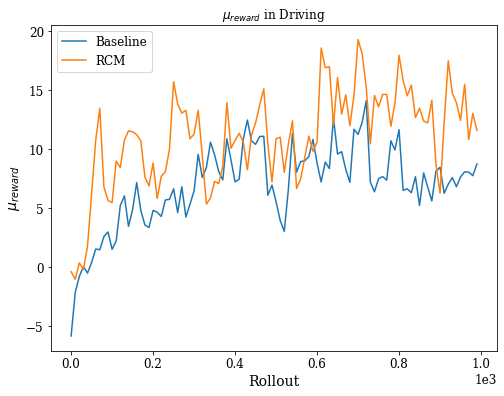

In [80]:
pong_metrics4 = figure_factory(log_dir, "Driving", 2, .5, DECIMATE, save=SAVE, loc_rwd=4, loc_feat=1, zoom_rwd=2., zoom_feat=4,
                               window=WINDOW) 